In [20]:
from brian2 import *
%matplotlib inline
import numpy as np
import pytime
    
n = 28
nL1 = nL2 = n**2

[X,Y] = np.meshgrid(range(n), range(n))

taum = 10*ms
taue = 100*ms
taui = 100*ms
duration = 500*ms

dge = 200*mV

eqsPOISSON='''
rates : Hz
x : 1 (constant)
y : 1 (constant)
'''

eqsLGN='''
dv/dt  = (ge-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
x : 1 (constant)
y : 1 (constant)
'''

eqsV1='''
dv/dt  = (ge-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
x : 1 (constant)
y : 1 (constant)
ori : 1 (constant)
'''

################################################## Layer 1 ################################################################

L1 = NeuronGroup(nL1,
                 eqsPOISSON,
                 threshold='rand()<rates*dt')

L1.x = X.flatten()
L1.y = Y.flatten()
FR = 100*Hz
pat = np.zeros((28,28))
pat[11:17,11:17] = 1
L1.rates = pat.flatten()*FR

################################################## Layer 2a ###############################################################

L2a = NeuronGroup(nL2,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L2a.x = X.flatten()
L2a.y = Y.flatten()

e1a = Synapses(L1, L2a, on_pre='ge += dge')
e1a.connect(condition = 'i==j')
i1a = Synapses(L1, L2a, on_pre='ge -= 1/8*dge')
i1a.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2 and i!=j')

################################################## Layer 2b ###############################################################

nb = int(n/2)
nL2b = nb**2
[Xb,Yb] = np.meshgrid(range(nb), range(nb))

L2b = NeuronGroup(nL2b,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L2b.x = Xb.flatten()
L2b.y = Yb.flatten()

e1b = Synapses(L1, L2b, on_pre='ge += 1/4*dge')
e1b.connect(condition = '(x_post==x_pre/2 or x_post==(x_pre-1)/2) and (y_post==y_pre/2 or y_post==(y_pre-1)/2)')

################################################## Layer 3b ###############################################################

L3b = NeuronGroup(nL2b,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L3b.x = Xb.flatten()
L3b.y = Yb.flatten()

e2b = Synapses(L2b, L3b, on_pre='ge += dge')
e2b.connect(condition = 'i==j')
i2b = Synapses(L2b, L3b, on_pre='ge -= 1/8*dge')
i2b.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2 and i!=j')

################################################## Layer 2c ###############################################################

nc = int(n/4)
nL2c = nc**2
[Xc,Yc] = np.meshgrid(range(nc), range(nc))

L2c = NeuronGroup(nL2c,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L2c.x = Xc.flatten()
L2c.y = Yc.flatten()

e1c = Synapses(L1, L2c, on_pre='ge += 1/16*dge')
cx = '(x_post==x_pre/4 or x_post==(x_pre-1)/4 or x_post==(x_pre-2)/4 or x_post==(x_pre-3)/4) and '
cy = '(y_post==y_pre/4 or y_post==(y_pre-1)/4 or y_post==(y_pre-2)/4 or y_post==(y_pre-3)/4)'
cond = cx + cy
e1c.connect(condition = cond)

################################################## Layer 3c ###############################################################

L3c = NeuronGroup(nL2c,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L3c.x = Xc.flatten()
L3c.y = Yc.flatten()

e2c = Synapses(L2c, L3c, on_pre='ge += dge')
e2c.connect(condition = 'i==j')
i2c = Synapses(L2c, L3c, on_pre='ge -= 1/8*dge')
i2c.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2 and i!=j')

################################################## Layer 2d ###############################################################

nd = int(nb/2)
nL2d = nd**2
[Xd,Yd] = np.meshgrid(range(nd), range(nd))

L2d = NeuronGroup(nL2d,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L2d.x = Xd.flatten()
L2d.y = Yd.flatten()

e1d = Synapses(L2b, L2d, on_pre='ge += 1/4*dge')
e1d.connect(condition = '(x_post==x_pre/2 or x_post==(x_pre-1)/2) and (y_post==y_pre/2 or y_post==(y_pre-1)/2)')

################################################## Layer 3d ###############################################################

L3d = NeuronGroup(nL2d,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L3d.x = Xd.flatten()
L3d.y = Yd.flatten()

e2d = Synapses(L2d, L3d, on_pre='ge += dge')
e2d.connect(condition = 'i==j')
i2d = Synapses(L2d, L3d, on_pre='ge -= 1/8*dge')
i2d.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2 and i!=j')

sp1 = SpikeMonitor(L1)
sp2a = SpikeMonitor(L2a)
sp2b = SpikeMonitor(L2b)
sp3b = SpikeMonitor(L3b)
sp2c = SpikeMonitor(L2c)
sp3c = SpikeMonitor(L3c)
sp2d = SpikeMonitor(L2d)
sp3d = SpikeMonitor(L3d)
run(duration)

## Case A) Kernel 3x3 (no mean)

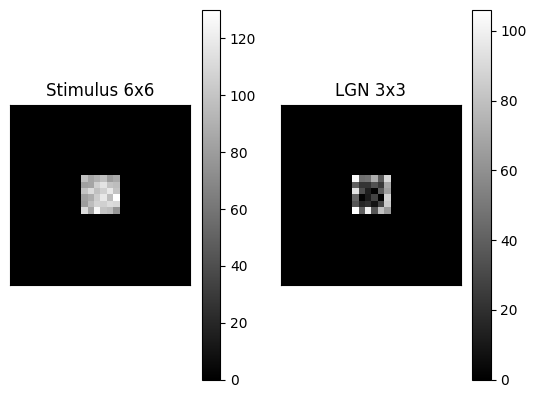

In [31]:
subplot(121)
tmp = sp1.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
title('Stimulus 6x6')
xticks([])
yticks([])
colorbar()

subplot(122)
tmp = sp2a.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
title('LGN 3x3')
xticks([])
yticks([])
colorbar()

## Case B) Kernel 6x6 (2x2 mean -> kernel lgn 3x3)

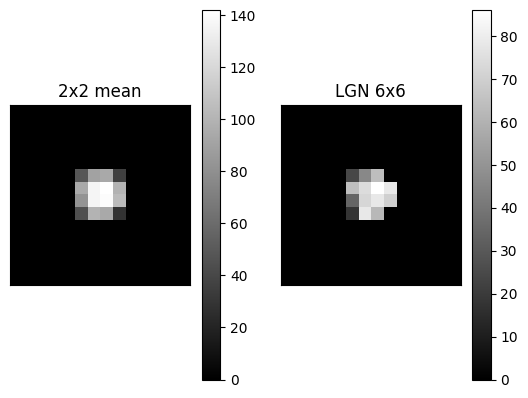

In [30]:
subplot(121)
tmp = sp2b.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(14,14)
imshow(tmp,cmap='gray')
title('2x2 mean')
xticks([])
yticks([])
colorbar()

subplot(122)
tmp = sp3b.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(14,14)
imshow(tmp,cmap='gray')
title('LGN 6x6')
xticks([])
yticks([])
colorbar()

## Comparison kernel 12x12

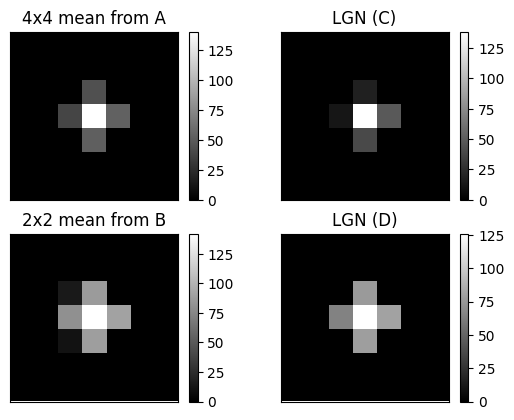

In [32]:
subplot(221)
tmp = sp2c.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(7,7)
imshow(tmp,cmap='gray')
title('4x4 mean from A')
xticks([])
yticks([])
colorbar()

subplot(222)
tmp = sp3c.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(7,7)
imshow(tmp,cmap='gray')
title('LGN (C)')
xticks([])
yticks([])
colorbar()

subplot(223)
tmp = sp2d.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(7,7)
imshow(tmp,cmap='gray')
title('2x2 mean from B')
xticks([])
yticks([])
colorbar()

subplot(224)
tmp = sp3d.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(7,7)
imshow(tmp,cmap='gray')
title('LGN (D)')
xticks([])
yticks([])
colorbar()